In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

In [26]:
df_train = pd.read_csv('WDBC_Train.csv')
df_valid = pd.read_csv('WDBC_Validation.csv')
df_test = pd.read_csv('WDBC_Test.csv')

In [27]:
X_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0]

X_valid = df_valid.iloc[:,1:]
y_valid = df_valid.iloc[:,0]

X_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

In [31]:
print(X_train)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0         11.360         17.57           72.49      399.8          0.08858   
1         21.610         22.28          144.40     1407.0          0.11670   
2         13.150         15.34           85.31      538.9          0.09384   
3          9.683         19.34           61.05      285.7          0.08491   
4         21.560         22.39          142.00     1479.0          0.11100   
..           ...           ...             ...        ...              ...   
336       12.830         15.73           82.89      506.9          0.09040   
337       10.510         20.19           68.64      334.2          0.11220   
338       13.750         23.77           88.54      590.0          0.08043   
339       12.460         12.83           78.83      477.3          0.07372   
340       15.500         21.08          102.90      803.1          0.11200   

     compactness_mean  concavity_mean  concave_points_mean  sym

In [28]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_test_pred = logistic_reg.predict(X_test)
y_valid_pred=logistic_reg.predict(X_valid)

/home/user/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


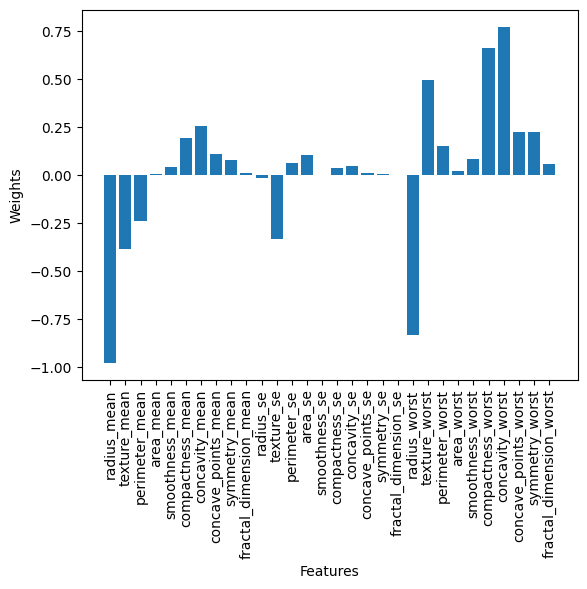

In [29]:
features = X_train.columns.tolist()
weights = logistic_reg.coef_[0]

plt.bar(features, weights)
plt.xlabel("Features")
plt.ylabel("Weights")
plt.xticks(rotation=90)
plt.show()

In [30]:
def performance(model_name, y_true, y_pred):
    print(f"Performance for {model_name}:\n")
    print(f"Confusion matrix: \n{confusion_matrix(y_true,y_pred)}")
    print(f"Accuracy: \t{accuracy_score(y_true, y_pred)}")
    print(f"Precision: \t{precision_score(y_true, y_pred)}")
    print(f"Recall: \t{recall_score(y_true, y_pred)}")
    print(f"F1-score: \t{f1_score(y_true, y_pred)}\n\n")

performance("Validation data", y_valid, y_valid_pred)
performance("Test data", y_test, y_test_pred)

Performance for Validation data:

Confusion matrix: 
[[70  1]
 [ 5 38]]
Accuracy: 	0.9473684210526315
Precision: 	0.9743589743589743
Recall: 	0.8837209302325582
F1-score: 	0.9268292682926831


Performance for Test data:

Confusion matrix: 
[[69  3]
 [ 3 39]]
Accuracy: 	0.9473684210526315
Precision: 	0.9285714285714286
Recall: 	0.9285714285714286
F1-score: 	0.9285714285714286


